# COMP-2704: Supervised Machine Learning
# Group7
# House predictions with linear regression

In [1]:
import turicreate as tc
import numpy as n
import pandas as pd
import matplotlib.pyplot as plt
import utils

In [2]:
data = tc.SFrame('Hyderabad.csv')
data.shape

Finished parsing file /home/chenjian/Downloads/submitted/Hyderabad.csv

Parsing completed. Parsed 100 lines in 0.091625 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/chenjian/Downloads/submitted/Hyderabad.csv

Parsing completed. Parsed 2518 lines in 0.090306 secs.

(2518, 40)

In [3]:
data.shape


(2518, 40)

In [4]:
data = tc.SFrame('Hyderabad.csv')
data

Finished parsing file /home/chenjian/Downloads/submitted/Hyderabad.csv

Parsing completed. Parsed 100 lines in 0.058628 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/chenjian/Downloads/submitted/Hyderabad.csv

Parsing completed. Parsed 2518 lines in 0.055675 secs.

Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens
6968000,1340,Nizampet,2,0,0,1,1,1
29000000,3498,Hitech City,4,0,0,1,1,1
6590000,1318,Manikonda,2,0,0,1,0,0
5739000,1295,Alwal,3,1,0,0,0,0
5679000,1145,Kukatpally,2,0,0,0,0,1
6099000,1230,Nizampet,2,0,0,0,0,0
7000000,1350,Manikonda,2,0,0,0,0,0
4198000,1400,Gachibowli,3,0,0,1,1,0
9900000,2240,Tellapur,3,0,0,1,1,0
9800000,1520,Gachibowli,2,1,0,0,0,0


### Exploring the relationship between price and area

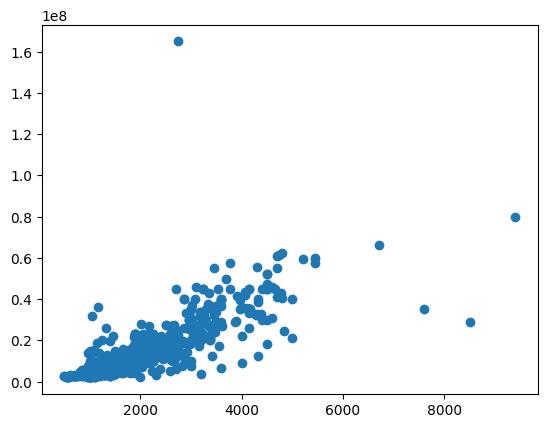

In [5]:
plt.scatter(data['Area'], data['Price'])

In [6]:
simple_model = tc.linear_regression.create(data, features=['Area'], target='Price')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.001746     | 144388015.462213   | 21510262.368166      | 4961490.138318                  | 3636255.514612                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [7]:
simple_model.coefficients

name,index,value,stderr
(intercept),None,-6162672.537279632,244862.209112593
Area,None,9736.238936387714,135.83638217863884


In [8]:
b, m = simple_model.coefficients['value']
print("slope:", m)
print("y-intercept:", b)

slope: 9736.238936387714
y-intercept: -6162672.537279632


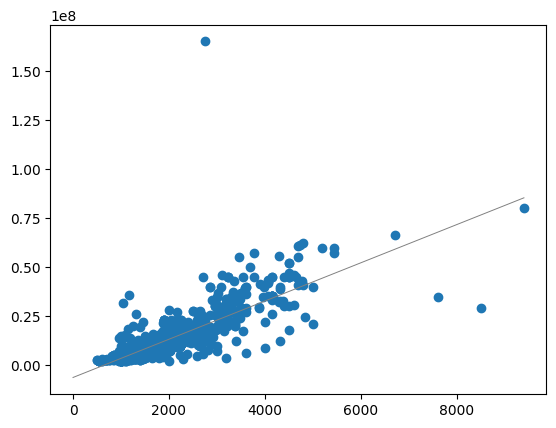

In [9]:
plt.scatter(data['Area'], data['Price'])
utils.draw_line(m, b, starting=0, ending=max(data['Area']))

### Building a model that uses all the features

In [10]:
model = tc.linear_regression.create(data, target='Price')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

Number of features          : 39

Number of unpacked features : 39

Number of coefficients    : 275

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.073860     | 140503541.692502   | 18868295.650496      | 4237015.350724                  | 3863193.193521                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [11]:
model.coefficients

name,index,value,stderr
(intercept),None,-3071779.379764775,606438.8709276111
Area,None,9050.383579653124,259.4145108797101
Location,Hitech City,4456618.3773537055,787584.0939111579
Location,Manikonda,50617.270316835406,665059.6012014516
Location,Alwal,-610857.5709462514,1180018.6242177475
Location,Kukatpally,1697187.6196636865,649180.0453902667
Location,Gachibowli,4613658.091295358,749155.8833215033
Location,Tellapur,-977410.686469491,1090409.8141667459
Location,Kokapet,650396.7882864735,797053.8871416127
Location,Hyder Nagar,1826929.1068828618,2300588.5249624127


In [12]:
model.evaluate(data)

{'max_error': 140503541.69250217, 'rmse': 4219096.698942512}

In [13]:
house = tc.SFrame({'Area': [1000], 'No. of Bedrooms':[3]})
house

Area,No. of Bedrooms
1000,3


In [14]:
model.predict(house)

dtype: float
Rows: 1
[2088681.1735693105]

# ***** Answers to Problem development 1 starts here: *****

### a) [2 marks] How many rows and columns are in the data file?

#### Answer: 40 columns and 2518 rows

### b) [2 marks] Just from looking at the data, are there any potential outliers shown in the price vs. area scatter plot? List the (x, y) coordinates of any potential outliers.

In [15]:
df = data.to_dataframe()   #transforming Sfdata to df

In [16]:
df.describe()   #describing data to know percentile values

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,2.518000e+03,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,...,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000
mean,9.818380e+06,1644.571088,2.623511,0.227562,0.412629,0.739873,0.709690,0.619142,0.559968,0.606434,...,0.975774,0.360207,0.607228,0.342732,0.330024,0.321287,0.334392,0.342335,0.341144,0.324861
std,8.777113e+06,746.256956,0.687330,0.419341,1.626445,1.611024,1.615231,1.624426,1.627686,1.625308,...,1.557725,1.622778,1.625256,1.621178,1.619894,1.618953,1.620347,1.621139,1.621023,1.619344
min,2.000000e+06,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.760000e+06,1160.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.754000e+06,1500.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.090000e+07,1829.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.650000e+08,9400.000000,8.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [33]:
#Calculatin upper edge boundary of outliers based on area
upper_edge_interquartile_area = (1829-1160)*1.5 +1829   
#Show the upper boundary
print(f' upper boundary of area is {upper_edge_interquartile_area}')
#Calculatin upper edge boundary of outliers based on price
upper_edge_interquartile_price = (10900000-4760000)*1.5 +10900000 
#Show the upper boundary
print(f' upper boundary of price is {upper_edge_interquartile_price}')

 upper boundary of area is 2832.5
 upper boundary of price is 20110000.0


In [69]:
# get all the outliers
outliers = df[(df['Area'] > upper_edge_interquartile_area) | (df['Price'] > upper_edge_interquartile_price)]     
# list outliers in data frame
outliers

pandas.core.frame.DataFrame

### The data frame has 9% of outliers 216 out of upper boundary of 2518 total values

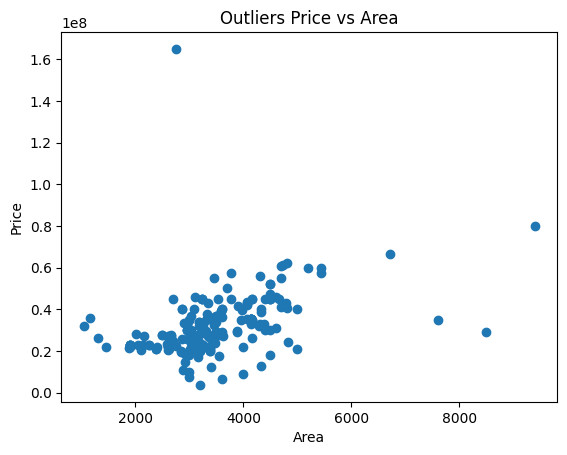

In [41]:
#Draw the outliers data frame calculated based on price or area
plt.scatter(outliers['Area'], outliers['Price'])
# add labels to the x and y axes
plt.xlabel('Area')
plt.ylabel('Price')
# display the plot
plt.title("Outliers Price vs Area")
plt.show()

In [96]:
# list the (x,y) of the outliers
print('outliers coordinates (Area,Price)')
# loop for each rows
for row in outliers.iterrows():
    # print x:area y:price values
    print(f'({row[1][1]}, {row[1][0]})')

outliers coordinates (Area,Price)
(3498, 29000000)
(3498, 29000000)
(2956, 30000000)
(2100, 20500000)
(3500, 28200000)
(3031, 25600000)
(3380, 20200000)
(3380, 20200000)
(4500, 47200000)
(3380, 21500000)
(4780, 43000000)
(2500, 27500000)
(3959, 35000000)
(4500, 30000000)
(2500, 27500000)
(2700, 25000000)
(3100, 46000000)
(4500, 45000000)
(4500, 45000000)
(4500, 45000000)
(3200, 28000000)
(2950, 30000000)
(2950, 30000000)
(4067, 35500000)
(3090, 27500000)
(6718, 66400000)
(2956, 33000000)
(2956, 33000000)
(4500, 52000000)
(4500, 52000000)
(3600, 40000000)
(3600, 40000000)
(3500, 36700000)
(3500, 36700000)
(1900, 23000000)
(1900, 22900000)
(1900, 23000000)
(1900, 23000000)
(3145, 20000000)
(2900, 33300000)
(3000, 35000000)
(3000, 35000000)
(4070, 43000000)
(3025, 30200000)
(3200, 24000000)
(1900, 22000000)
(1880, 21400000)
(3600, 36500000)
(3031, 28000000)
(3448, 32500000)
(3015, 20700000)
(2007, 28000000)
(2960, 25500000)
(1900, 23000000)
(3000, 20000000)
(2848, 19400000)
(2580, 2320000

## c) [2 marks] What is the equation of the best fit line produced by simple_model that uses only price and area?

In [20]:
# show the coefficients in simple_model
simple_model.coefficients

name,index,value,stderr
(intercept),None,-6162672.537279632,244862.209112593
Area,None,9736.238936387714,135.83638217863884


In [21]:
# get slope and y intercept in simple_model
b, m = simple_model.coefficients['value']       
# show the slope
print("slope:", m)
# show the intercpt
print("y-intercept:", b)

slope: 9736.238936387714
y-intercept: -6162672.537279632


### c) Answer: Equation:
### The simple mode prediction equation is 
### price = 9736.238936387714 * area - 6162672.537279632

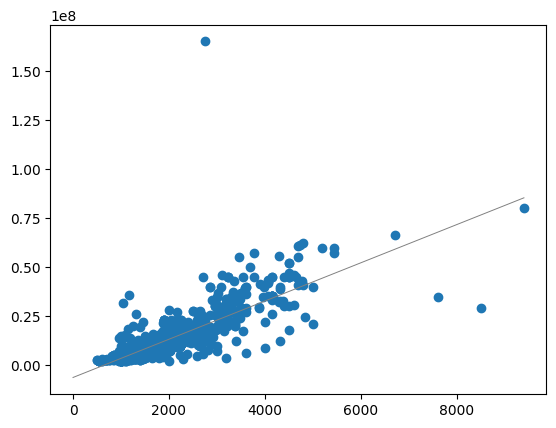

In [22]:
# scatter plot the data
plt.scatter(data['Area'], data['Price'])
# plot the function
utils.draw_line(m, b, starting=0, ending=max(data['Area']))

### d) What coefficient values are associated with the intercept and area in the trained model that uses all features?
### * Are these values the same as the intercept and slope found by simple_model?

In [99]:
# show the coefficients in model
model.coefficients      

name,index,value,stderr
(intercept),None,-3071779.379764775,606438.8709276111
Area,None,9050.383579653124,259.4145108797101
Location,Hitech City,4456618.3773537055,787584.0939111579
Location,Manikonda,50617.270316835406,665059.6012014516
Location,Alwal,-610857.5709462514,1180018.6242177475
Location,Kukatpally,1697187.6196636865,649180.0453902667
Location,Gachibowli,4613658.091295358,749155.8833215033
Location,Tellapur,-977410.686469491,1090409.8141667459
Location,Kokapet,650396.7882864735,797053.8871416127
Location,Hyder Nagar,1826929.1068828618,2300588.5249624127


### coefficient values  associated with the intercept in all features model is -3071779.379764775
### coefficient values  associated area is 9050.383579653124

In [100]:
# show the coefficients in model
simple_model.coefficients 

name,index,value,stderr
(intercept),None,-6162672.537279632,244862.209112593
Area,None,9736.238936387714,135.83638217863884


### coefficient values  associated with the intercept in simple model is -6162672.537279632
### coefficient values  associated area is 9736.238936387714

##### No, 
##### The values for the intercept and slope found by the simple_model, which uses only the 'Area' feature, is different from the values obtained from the trained model that uses all features. This is because the simple_model only considers the relationship between the 'Price' and 'Area' features, while the trained model that uses all features considers the relationships between 'Price' and all the features in the data. As a result, the coefficients in the trained model that uses all features will reflect the combined effects of all the features on the 'Price' variable, while the coefficients in the simple_model will only reflect the effect of the 'Area' feature.

### e) What is the maximum error and root-mean-squared error of model? Explain what these mean.

##### The maximum error of model is 140503541.69250217 and The  root-mean-squared error of model is 4219096.698942512

##### Maximum error  represents the worst-case prediction error of the model. While, root-mean-squared error is a measure of the overall accuracy of the model's predictions.

### f) Using model, predict the price of a house with three bedrooms and an area of 1000 square feet. Provide an uncertainty for this prediction.
##### the price of a house with three bedrooms and an area of 1000 square feet is 2088681.1735693105
##### since maximum error and RMSE are high, the uncertainty of prediction is also high 

In [26]:
# create a house with area = 1000 and No. of bedrooms = 3
house = tc.SFrame({'Area': [1000], 'No. of Bedrooms':[3]})
# check if the features are correctly assigned 
house

Area,No. of Bedrooms
1000,3


In [27]:
# get the prediction price from the model
predict_price = model.predict(house)[0]
# print out the prediction price
print(f'The prediction price for area = 1000 and No. of bedrooms = 3 is {predict_price}')

The prediction price for area = 1000 and No. of bedrooms = 3 is 2088681.1735693105


In [25]:
# get all real data for area = 1000 and No. of bedrooms = 3
data_for_current_situation = data[(data['Area'] == 1000) & (data['No. of Bedrooms'] == 3)]
# check the data
data_for_current_situation   
# get the error data for current senario: area = 1000, bedrooms = 3
error_for_current_situation = model.evaluate(data_for_current_situation)
# show the error data
print(error_for_current_situation)
# get the rmse value for current senario
current_rmse = error_for_current_situation['rmse']

{'max_error': 3395936.3438454457, 'rmse': 2002681.0400495993}


If we assume resudual errors in RMSE are normally distributed. We can use RSME to provide an estimate of unceirtanty of the prediction.
The RMSE represents the standard deviation of the residuals

#### lower_bound = predict_price - 1.96 * current_rmse = 
#### upper_bound = predict_price + 1.96 * current_rmse =

In [28]:
# get the low boundary for 95% confidence
lower_bound = predict_price - 1.96* current_rmse #4218249.677558368
# get the High boundary for 95% confidence
upper_bound = predict_price + 1.96* current_rmse #4218249.677558368
# print out the result of the range with 95% confidence
print("we can say wit a 95% of confidence that the price will be in this range of price:", lower_bound, "and", upper_bound) 

we can say wit a 95% of confidence that the price will be in this range of price: -1836573.664927904 and 6013936.0120665245


The value of 1.96 is used because it corresponds to the 95% percentage based on the standard normal distribution. From the above calculation we can see the prediction has a very high uncertainty.